Paralleliser son code

In [4]:


import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

grid_shape = 10, 10
grid = np.random.randint(0, 2, size=grid_shape, dtype=np.uint8)
#grid[1:4, 3] = 1
print(grid)


def eval_pixel(row, col, grid, next_grid):
    """Follows the rules of Conway's game of life to
    flip (or not) a pixel in a grid
    """
    n, m = grid.shape
    sub_grid = grid[
        max(row-1, 0): min(n, row+2),
        max(col-1, 0): min(m, col+2)]
    if grid[row, col] and not (2 < sub_grid.sum() < 5):
        next_grid[row, col] = 0
    elif sub_grid.sum() == 3:
        next_grid[row, col] = 1


def conway_step(grid):
    """Applies Conway's rule for every pixel on a grid
    """
    ii, jj = np.meshgrid(
        np.arange(grid.shape[0]),
        np.arange(grid.shape[1]) )

    next_grid = grid.copy()
    for i, j in zip(ii.ravel(), jj.ravel()):
        eval_neighbors(i, j, grid, next_grid)
    return next_grid


def conway_loop(grid):
    """Play Conways game of life on repeat
    """
    while True:
        try:
            grid = conway_step(grid)
            print(grid)
            time.sleep(1)

        except KeyboardInterrupt:
            print('Done')
            break



[[0 1 0 0 0 1 1 1 0 0]
 [0 1 1 1 1 0 1 1 1 0]
 [0 1 0 0 1 1 1 1 0 1]
 [0 1 1 1 0 1 1 1 0 0]
 [1 0 0 0 0 1 0 1 0 0]
 [1 1 1 0 0 0 1 0 1 0]
 [1 0 0 0 1 0 0 1 1 0]
 [0 0 0 0 1 1 1 0 0 1]
 [0 1 0 1 0 0 0 1 1 1]
 [0 1 0 1 1 0 0 1 1 1]]


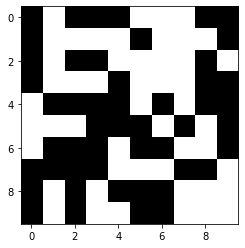

In [6]:
plt.imshow(grid, cmap='Greys_r')

In [ ]:
def show_conway(grid):
    fig, ax = plt.subplots()
    ax.imshow(grid, cmap='Greys_r')
    